In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('retail_sales_dataset.csv')

In [3]:
data.head

<bound method NDFrame.head of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  

In [4]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
data.shape

(1000, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### Checking for missing values

In [10]:
missing_values = data.isnull().sum()

In [11]:
print('missing_values:\n', missing_values)

missing_values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


### Detecing outliers using Interquartile Rang (IQR) method for numwerical features

In [12]:
numerical_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']


In [13]:
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1 # Interquatile

In [14]:
### Identifying outliers: Data points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = ((data[numerical_columns] < (Q1 - 1.5*IQR)) | (data[numerical_columns] > ( Q3 + 1.5*IQR))).sum()
print("Outliers:\n", outliers)

Outliers:
 Age               0
Quantity          0
Price per Unit    0
Total Amount      0
dtype: int64


### Histogram for Numerical Features

<function matplotlib.pyplot.show(close=None, block=None)>

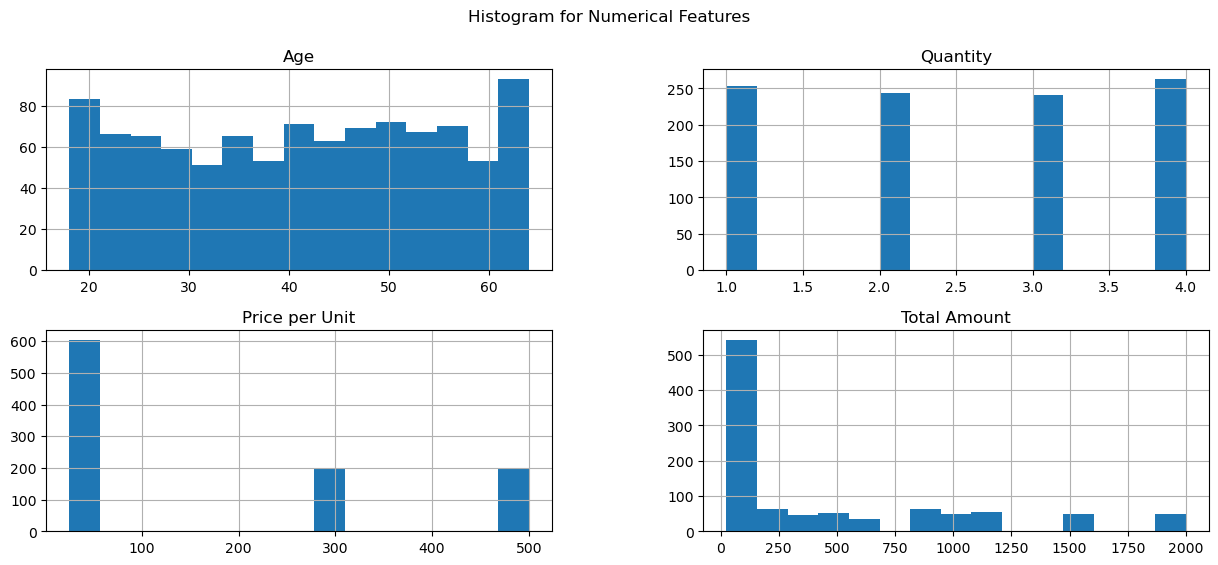

In [16]:
data[numerical_columns].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.suptitle('Histogram for Numerical Features')
plt.show

### Boxplot to detect outliers visually

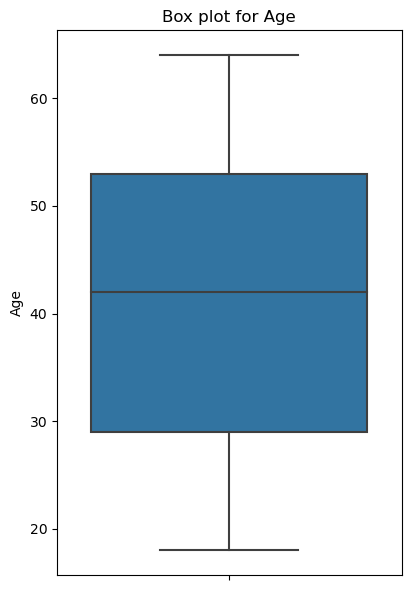

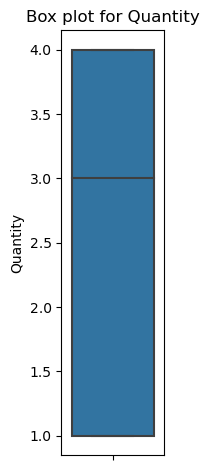

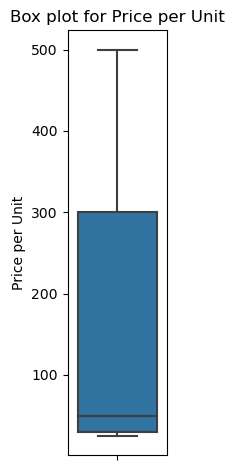

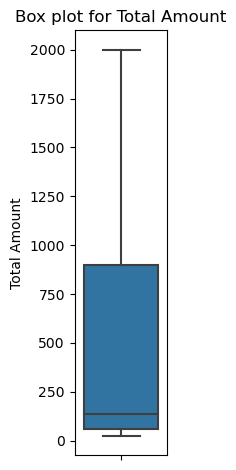

In [18]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Box plot for {col}')
    plt.tight_layout()
    plt.show()

### Scatter plot to visiualize relationships

C:\Users\User\Anaconda_Bakary\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

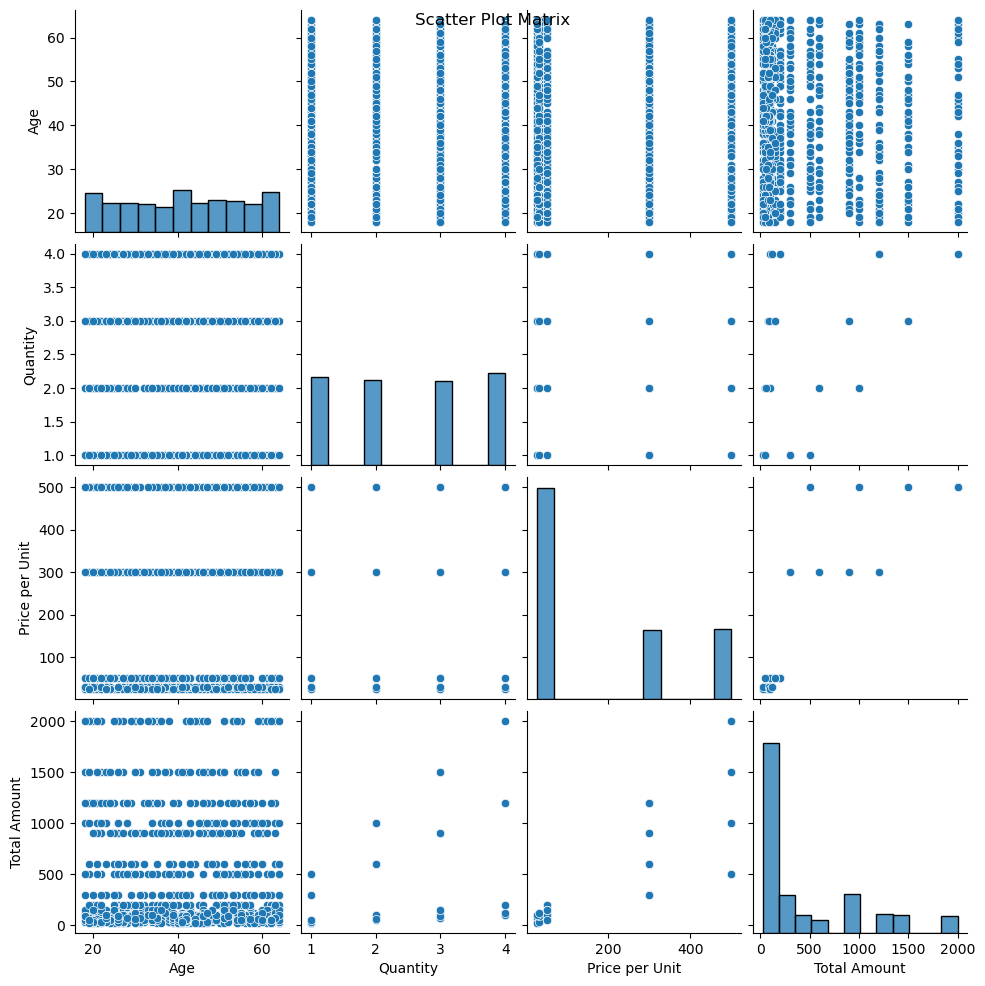

In [20]:
sns.pairplot(data[numerical_columns])
plt.suptitle('Scatter Plot Matrix')
plt.show

### Normalization/ Scaling
Normalize or Scale the numerical features to bring them into a similar range

In [21]:
from sklearn.preprocessing import MinMaxScaler


In [23]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [24]:
# Columns to scale 
columns_to_scale = ['Age', 'Quantity','Price per Unit','Total Amount']

In [28]:
# Applying MinMax scaling to the numerical columns 
data_scaled = data.copy()
data_scale[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [29]:
# Displaying the first few rows of the scaled dataset
print(data_scaled.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


### Splitting the Data into Training and Testing Sets
Split the dataset into training and testing set using an 80 - 20 split

In [31]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = data_scaled.drop(columns=['Total Amount', 'Transaction ID', 'Date', 'Customer ID', 'Gender', 'Product Category'])
y = data_scaled['Total Amount']

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (800, 3)
Testing Features Shape: (200, 3)
Training Labels Shape: (800,)
Testing Labels Shape: (200,)


### Feature Engineering
Create additional features that might be useful for predictions. This could include time-based features (e.g., day, month), rolling statistics, or transformations.

In [32]:
# Converting Date to datetime type
data_scaled['Date'] = pd.to_datetime(data_scaled['Date'])

# Extracting new time-based features
data_scaled['Year'] = data_scaled['Date'].dt.year
data_scaled['Month'] = data_scaled['Date'].dt.month
data_scaled['Day'] = data_scaled['Date'].dt.day
data_scaled['Weekday'] = data_scaled['Date'].dt.weekday\

# Display the updated dataset

print(data_scaled.head())


   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  Year  Month  Day  Weekday  
0         3              50           150  2023     11   24        4  
1         2             500          1000  2023      2   27        0  
2         1              30            30  2023      1   13        4  
3         1             500           500  2023      5   21        6  
4         2              50           100  2023      5    6        5  


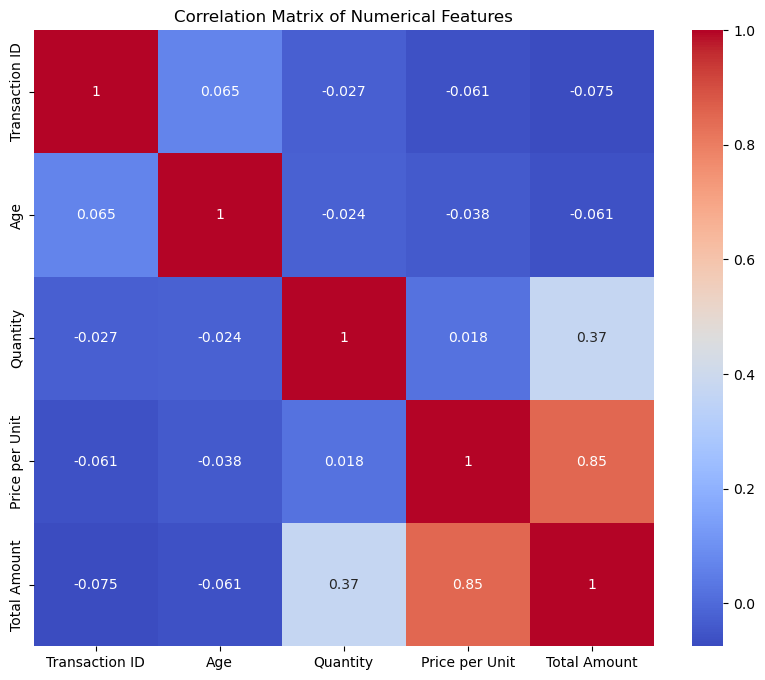

In [37]:
# Selecting only the numerical columns for correlation matrix
numerical_columns_for_corr = data_scaled.select_dtypes(include=['float64', 'int64']).columns

# Visualize correlations between new features
plt.figure(figsize=(10, 8))
sns.heatmap(data_scaled[numerical_columns_for_corr].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()
